In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import pandas_datareader.data as web


In [2]:
plt.style.use('ggplot')
import seaborn as sns

In [3]:
tesla = pd.read_csv('Tesla_Stock.csv', index_col='Date',parse_dates=True)
#start = datetime.datetime(2012,1,1)
#end = datetime.datetime(2017,1,1)
#tesla = web.DataReader('TSLA','gogle',start,end) -access public financial data from the Internet and import it into Python as a DataFrame
#tesla.head()

In [4]:
ford = pd.read_csv('Ford_Stock.csv',index_col='Date',parse_dates=True)

In [5]:
gm = pd.read_csv('GM_Stock.csv',index_col='Date',parse_dates=True)

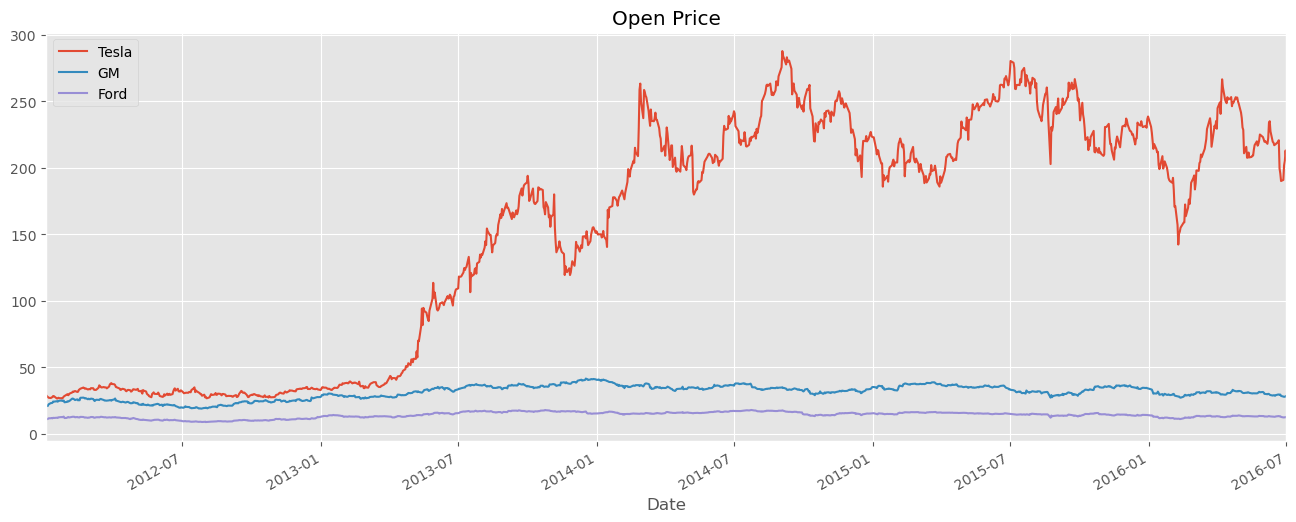

In [6]:
tesla['Open'].plot(label = 'Tesla',xlim=['2012-01-03','2016-07'], figsize=(16,6),title = 'Open Price')
gm['Open'].plot(label = 'GM')
ford['Open'].plot(label = 'Ford')
plt.legend();

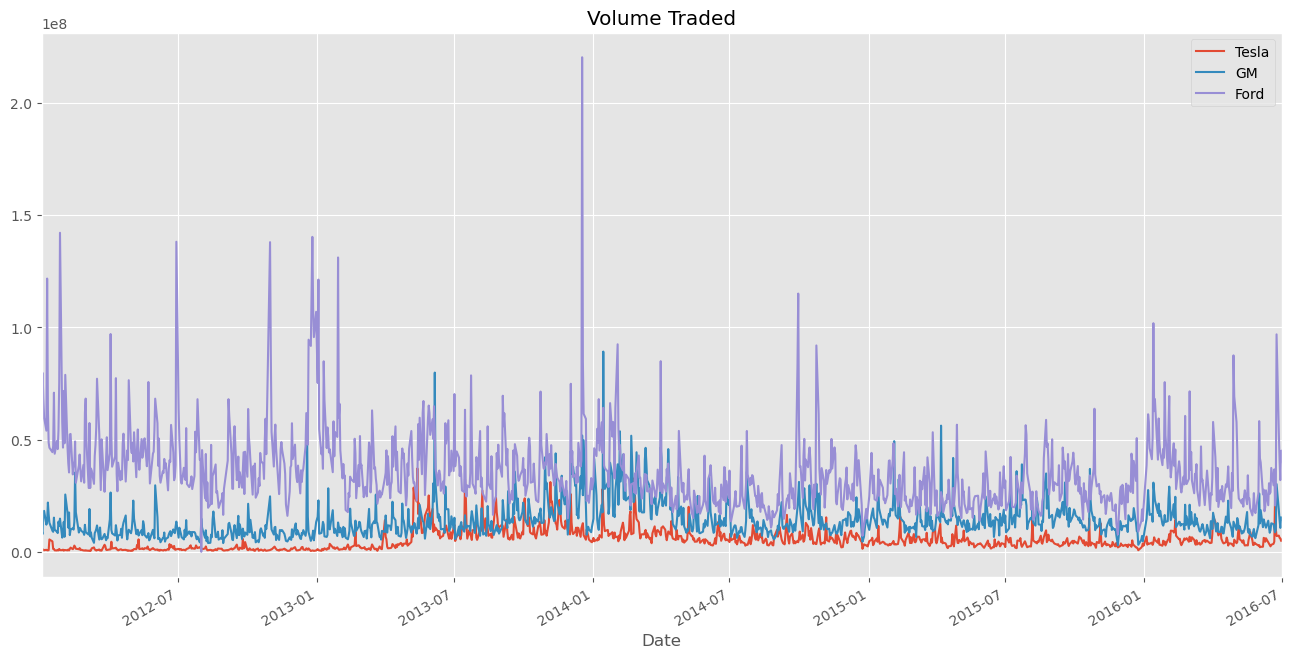

In [7]:
tesla['Volume'].plot(label='Tesla',xlim=['2012-01-03','2016-07'],figsize=(16,8),title=
                    'Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend()

In [8]:
#What is the date for maximum trading volume of Ford
ford['Volume'].index.max()

Timestamp('2016-12-30 00:00:00')

In [9]:
#Total market cap of the company
#Total money traded = Volume * Open price to show visual representation of total amount of money being traded around using the time series
tesla['Total Traded']= tesla['Volume']*tesla['Open']
gm['Total Traded']= gm['Volume']*gm['Open']
ford['Total Traded']= ford['Volume']*ford['Open']

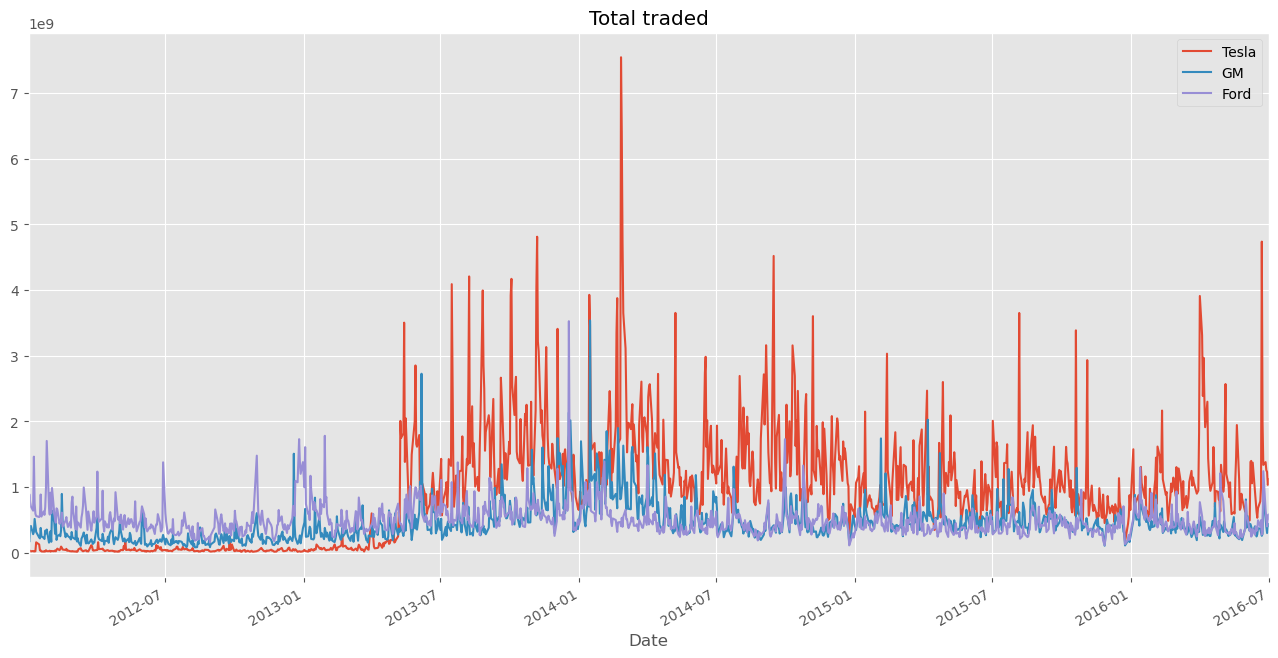

In [10]:
tesla['Total Traded'].plot(label='Tesla',xlim=['2012-01-03','2016-07'],figsize=(16,8),title=
                    'Total traded')
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()

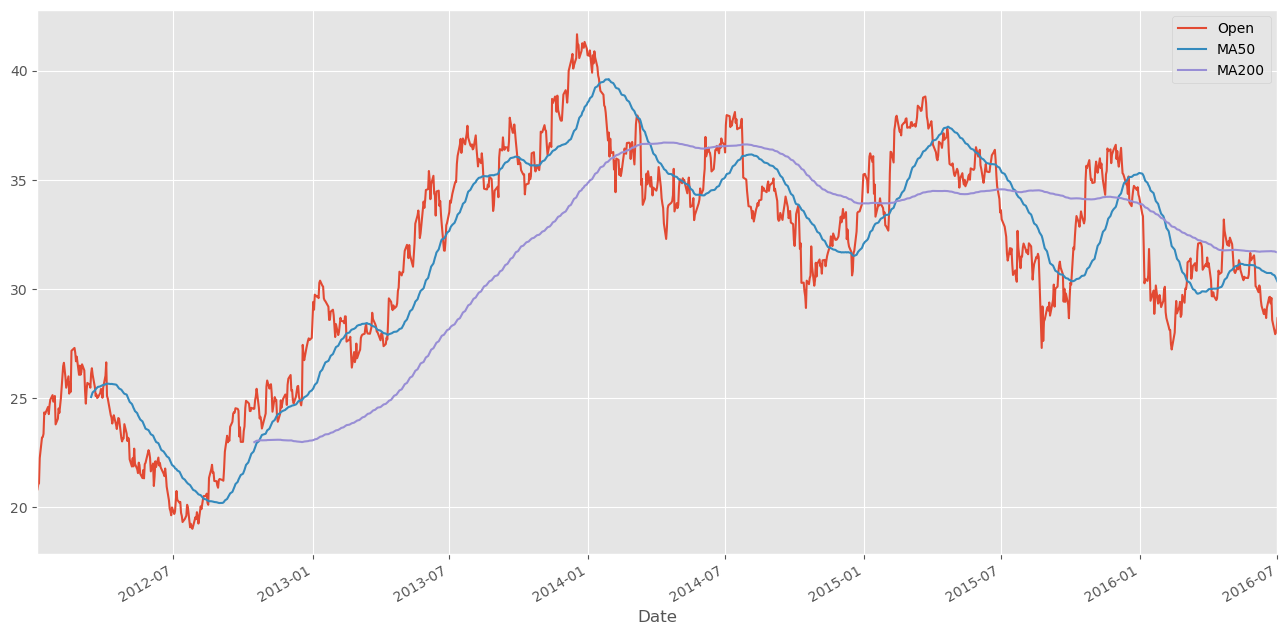

In [11]:
gm['Open'].plot(label='Open',figsize=(16,8),xlim=['2012-01-03','2016-07'])
gm['Open'].rolling(50).mean().plot(label='MA50')
gm['Open'].rolling(200).mean().plot(label='MA200')
plt.legend()
#gm['MA50']=gm['Open'].rolling(50).mean()
#...
#gm[['Open','MA50','MA200']].plot(figsize=(16,8))

In [12]:
#scatter matrix plot of all stocks' opening price
from pandas.plotting import scatter_matrix

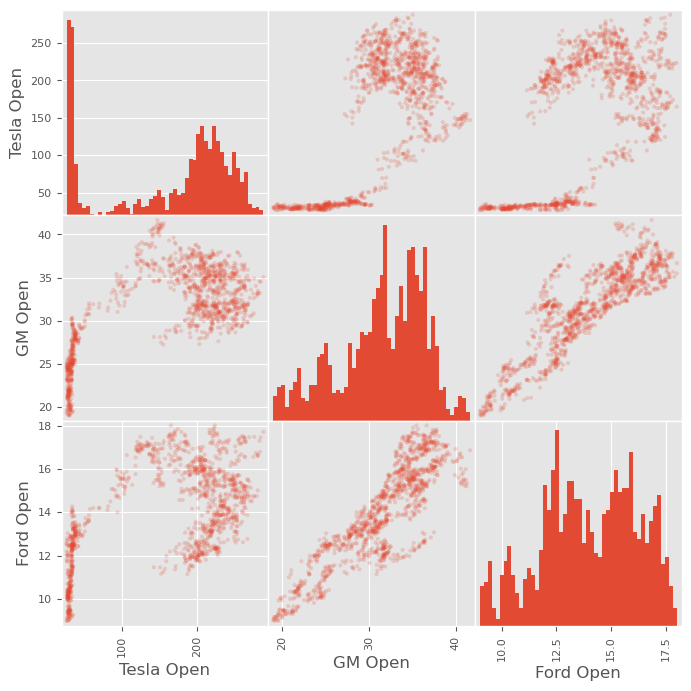

In [14]:
car_comp=pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis = 1)
car_comp.columns =['Tesla Open','GM Open','Ford Open']
scatter_matrix(car_comp,figsize=(8,8), alpha =0.2,hist_kwds=({'bins':50}));

In [25]:
import mplfinance as mpf

In [30]:
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [35]:
ford_reset = ford.loc['2012-01'].reset_index()
ford_reset

,Date,Open,High,Low,Close,Volume,Total Traded
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08
5,2012-01-10,12.00,12.05,11.63,11.80,121750545,1.461007e+09
6,2012-01-11,11.74,12.18,11.65,12.07,63806007,7.490825e+08
7,2012-01-12,12.16,12.18,11.89,12.14,48687666,5.920420e+08
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,5.571280e+08
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,5.416614e+08


In [41]:
ford_reset['date_ax']=ford_reset['Date'].apply(lambda date: date2num(date))

In [44]:
list_of_cols = ['date_ax','Open','High','Low','Close']
ford_values=[tuple(vals)for vals in ford_reset[list_of_cols].values]


In [45]:
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

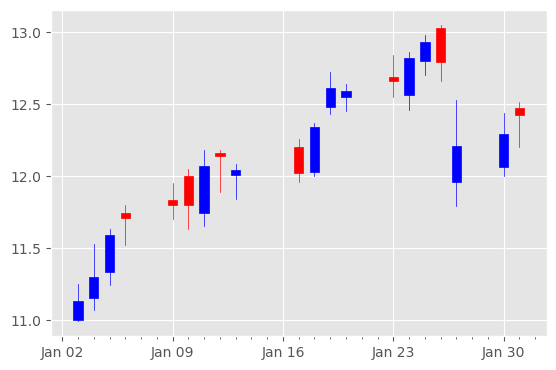

In [49]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,ford_values,width=.6,colorup='b',colordown='r');

In [66]:
#tesla['returns']=(tesla['Close']/tesla['Close'].shift(1))-1 #shift all the prices forward by 1
tesla['returns'] = tesla['Close'].pct_change(1) #percentage change btw current &prior element
gm['returns'] = gm['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)

In [63]:
tesla['Close']

Date
2012-01-03     28.08
2012-01-04     27.71
2012-01-05     27.12
2012-01-06     26.89
2012-01-09     27.25
               ...  
2016-12-23    213.34
2016-12-27    219.53
2016-12-28    219.74
2016-12-29    214.68
2016-12-30    213.69
Name: Close, Length: 1258, dtype: float64

In [53]:
tesla['Close'].shift(1)

Date
2012-01-03       NaN
2012-01-04     28.08
2012-01-05     27.71
2012-01-06     27.12
2012-01-09     26.89
               ...  
2016-12-23    208.45
2016-12-27    213.34
2016-12-28    219.53
2016-12-29    219.74
2016-12-30    214.68
Name: Close, Length: 1258, dtype: float64

In [55]:
tesla['Close'].shift(-1)

Date
2012-01-03     27.71
2012-01-04     27.12
2012-01-05     26.89
2012-01-06     27.25
2012-01-09     27.62
               ...  
2016-12-23    219.53
2016-12-27    219.74
2016-12-28    214.68
2016-12-29    213.69
2016-12-30       NaN
Name: Close, Length: 1258, dtype: float64

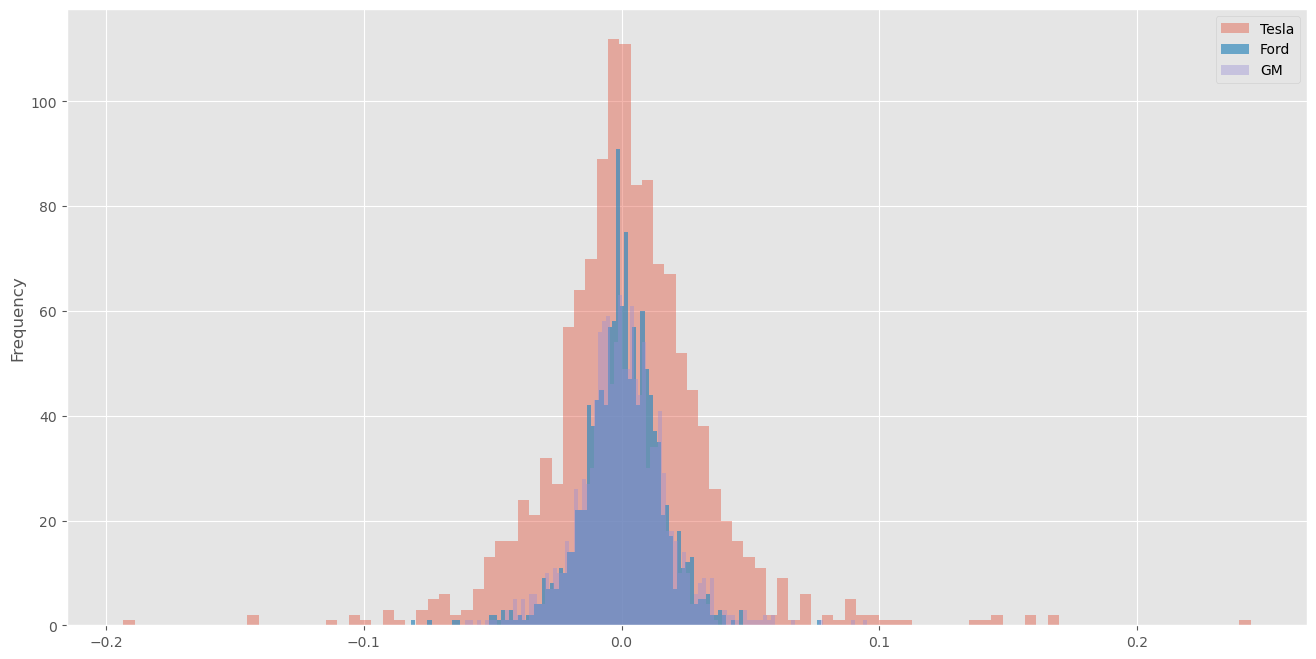

In [91]:
tesla['returns'].plot.hist(bins=100,label='Tesla',figsize=(16,8),alpha=0.4)
ford['returns'].plot.hist(bins=100,label='Ford',figsize=(16,8),alpha=0.7)
gm['returns'].plot.hist(bins=100,label='GM',figsize=(16,8),alpha=0.4)
plt.legend()

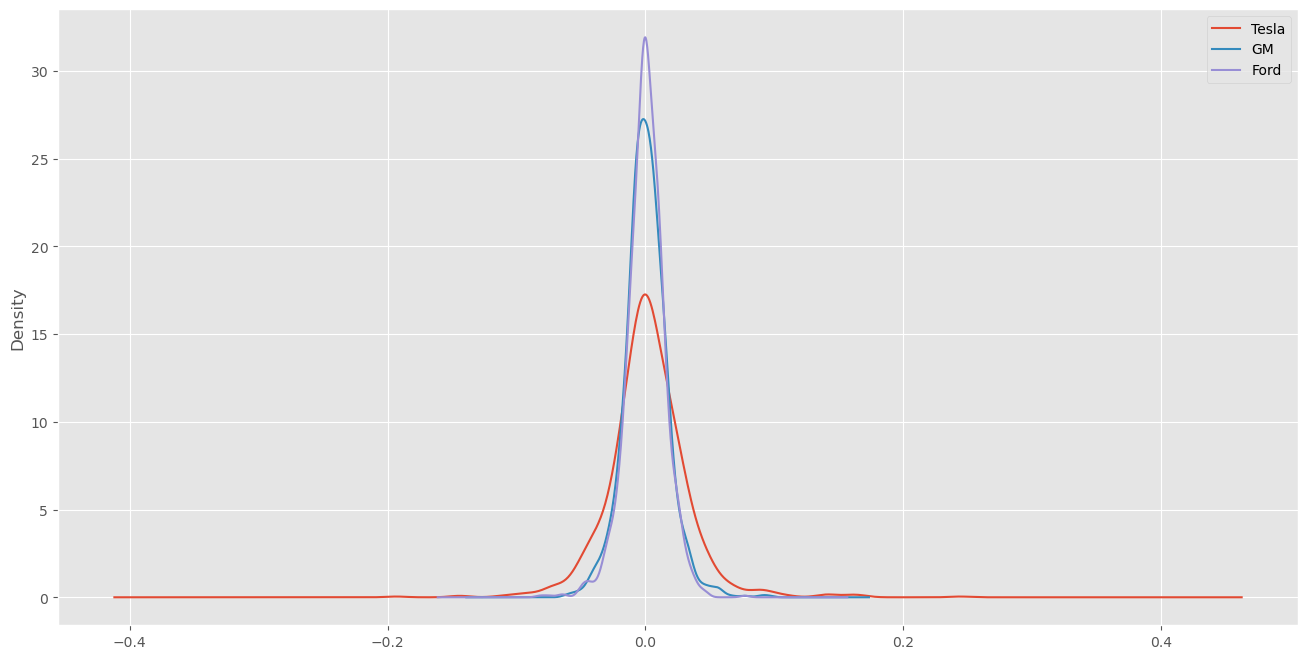

In [93]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(16,8))
gm['returns'].plot(kind='kde',label='GM',figsize=(16,8))
ford['returns'].plot(kind='kde',label='Ford',figsize=(16,8))
plt.legend()

<AxesSubplot:>

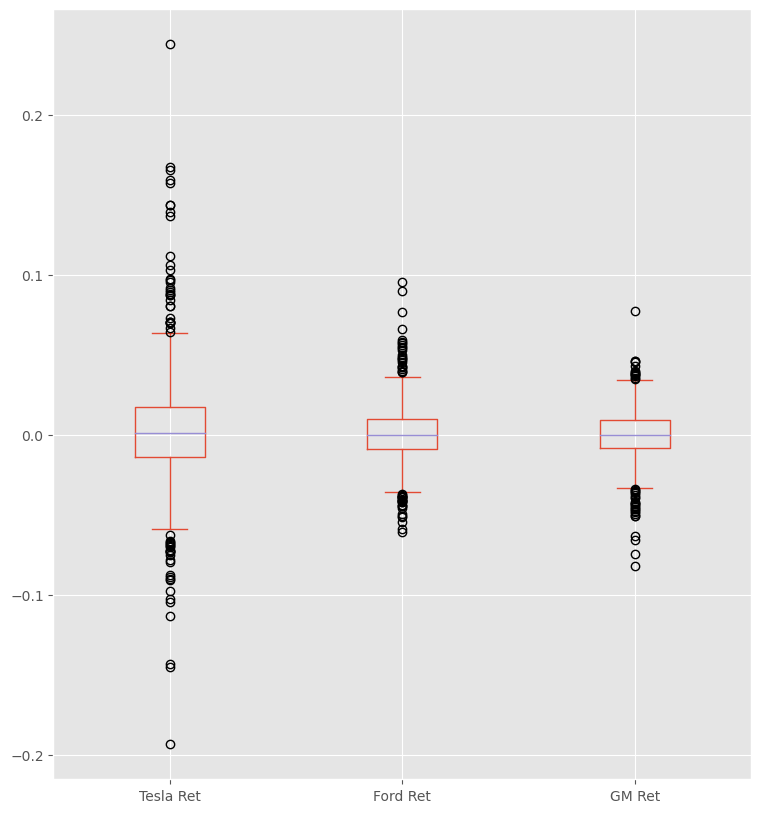

In [118]:
rdf=pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
rdf.columns = ['Tesla Ret','Ford Ret','GM Ret']
rdf.plot.box(figsize=(9,10))
#Different ways to analyze volatility based off the daily returns

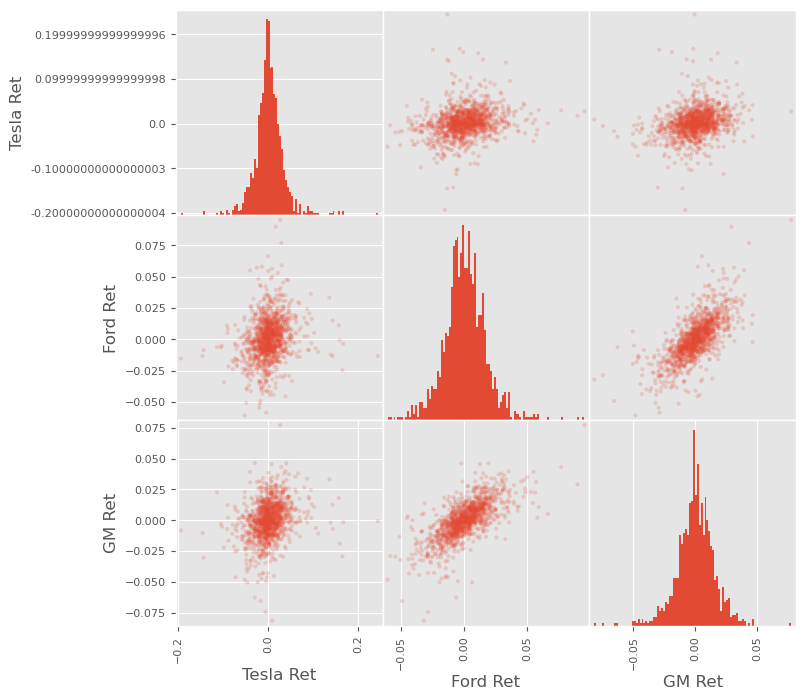

In [110]:
#Scatter matrix plot to see correlation btw each of the stocks daily returns
#To answer the question of how related the car companies are. E.g. Is Tesla treated more as a technology company rather than a car company by the market?
scatter_matrix(rdf,figsize=(8,8),alpha=0.2,hist_kwds=({'bins':100}));
#From the graph, we could see possible correlation btw Ford and GM

<AxesSubplot:xlabel='Ford Ret', ylabel='GM Ret'>

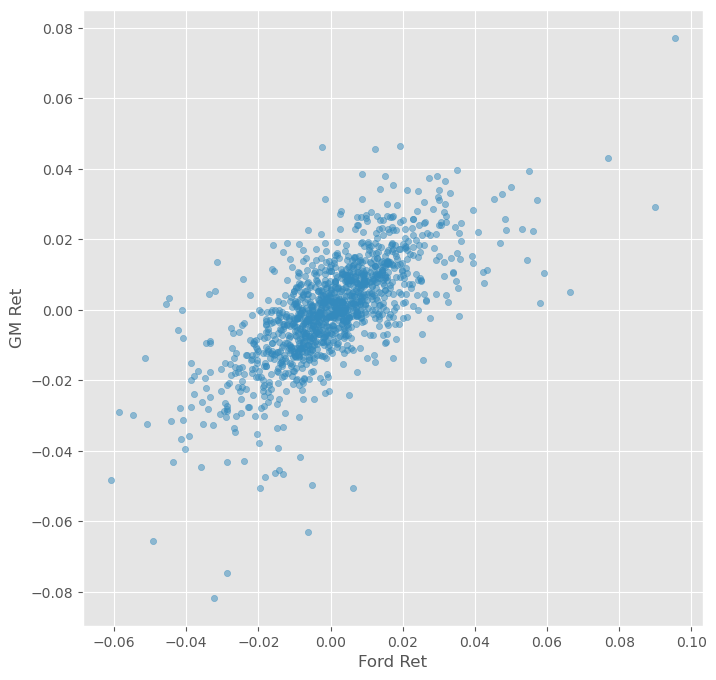

In [119]:
rdf.plot.scatter(x='Ford Ret',y='GM Ret',alpha=.5,figsize=(8,8))


In [125]:
from IPython.display import display, Math, Latex

In [149]:
#Cumulative returns</p>
#Aggregate amount an investment has gained or lost over time, independent of the period of time involved</p>
#Cumulative return is computed relative to the day investment is made</p>
#i = (1+rt)*i(t-1)
#df[daily_cumulative_return]=(1+df[pct_daily_return]).cumprod()

In [145]:
tesla['Cumulative Ret']=(1 + tesla['returns']).cumprod()
gm['Cumulative Ret']=(1 + gm['returns']).cumprod()
ford['Cumulative Ret']=(1 + ford['returns']).cumprod()

In [146]:
#Cumulative Return Column against the time series index
#The highest return &Lowest return for a $1 invested

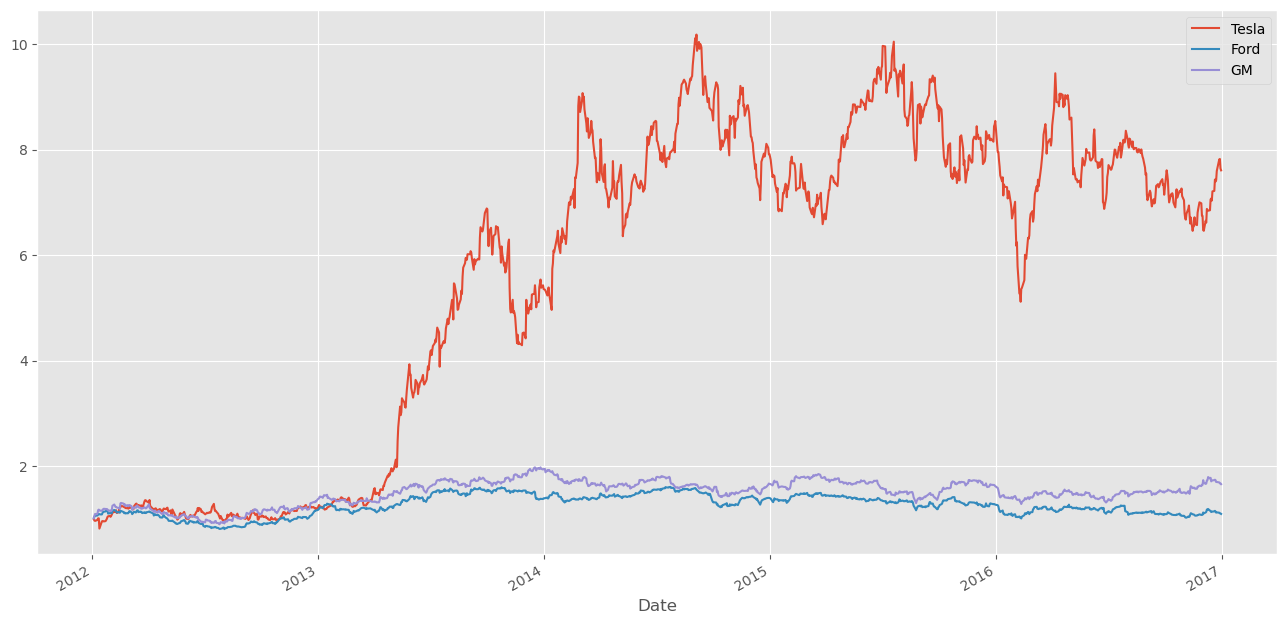

In [150]:
tesla['Cumulative Ret'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Ret'].plot(label='Ford')
gm['Cumulative Ret'].plot(label='GM')
plt.legend()

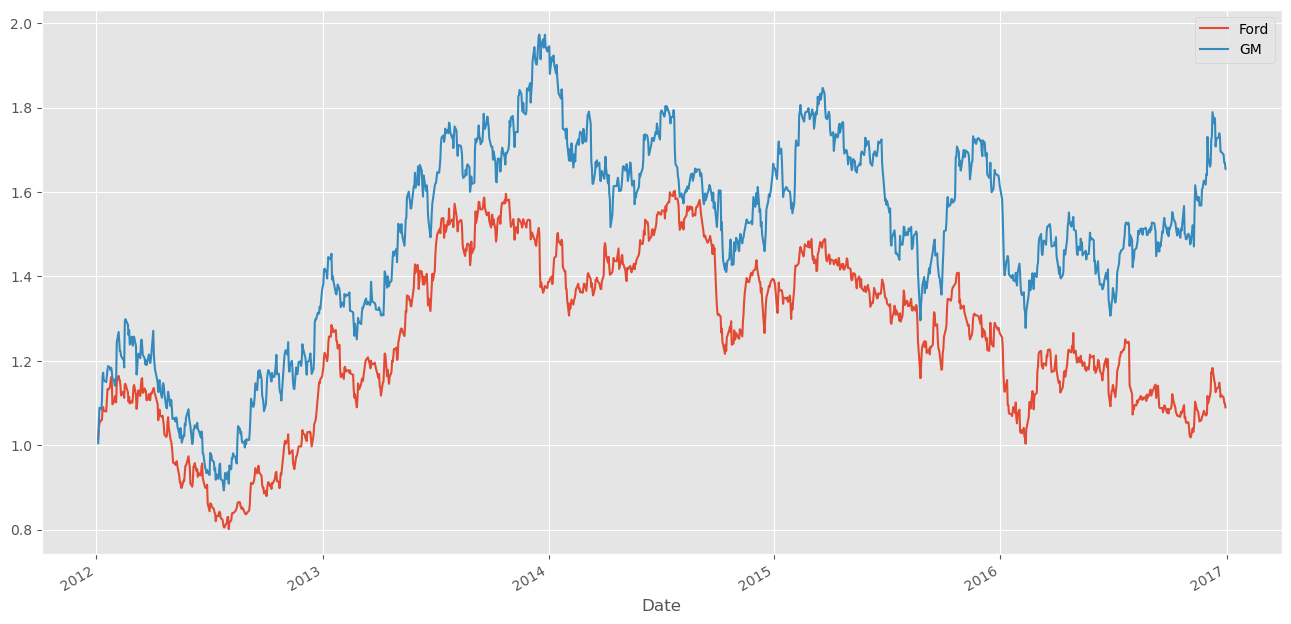

In [152]:
ford['Cumulative Ret'].plot(label='Ford',figsize=(16,8))
gm['Cumulative Ret'].plot(label='GM')
plt.legend()